In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
# Definição de estilo de tabela do Pandas

headers = {
    "selector": "th:not(.index_name)",
    "props": "background-color: #02607a; color: white; text-align: center"
}
properties = {"border": "1px solid black", "width": "400px", "height": "30px", "text-align": "center"}

In [ ]:
dataset = pd.read_csv("data/dataset_ac_serpro.csv")
nota_maxima_prova = 290

In [5]:
dataset.head(n=10).style.hide()

Nota/AC
250.000000
249.000000
248.000000
244.000000
244.000000
244.000000
244.000000
242.000000
242.000000
240.000000


## Estatísticas gerais

In [6]:

dataset.describe(percentiles=[.9,.95,.99]).style.format(precision=2).set_table_styles([headers]).set_properties(**properties)


,Nota/AC
count,361.00
mean,211.83
std,10.26
min,200.00
50%,209.00
90%,225.00
95%,233.50
99%,244.00
max,250.00


## Menor nota (Nota de corte)

In [7]:
dataset["Nota/AC"].min()

200.0

## Maior nota

In [8]:
dataset["Nota/AC"].max()

250.0

## Histograma de notas


(array([41., 40., 32., 40., 36., 31., 23., 18., 13., 20., 11., 10., 11.,
         6.,  6.,  2.,  3.,  1.,  5.,  1.,  2.,  2.,  4.,  0.,  3.]),
 array([200., 202., 204., 206., 208., 210., 212., 214., 216., 218., 220.,
        222., 224., 226., 228., 230., 232., 234., 236., 238., 240., 242.,
        244., 246., 248., 250.]),
 <BarContainer object of 25 artists>)

<Figure size 800x480 with 0 Axes>

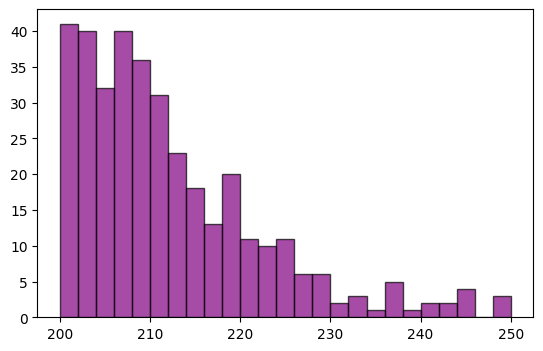

In [ ]:
# Histograma de notas

plt.hist(dataset["Nota/AC"],bins=25,color='purple',align='mid',alpha=0.7, edgecolor='black')

## Histograma de porcentagem de acertos

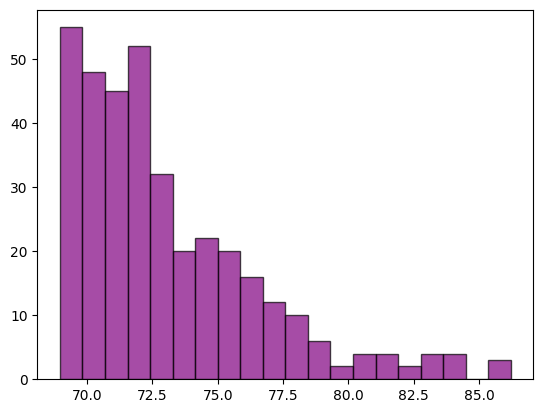

In [ ]:
# Histograma de porcentagem de acertos

plt.hist((dataset["Nota/AC"]/nota_maxima_prova)*100,bins=20,color='purple',align='mid',alpha=0.7, edgecolor='black')
#plt.savefig("distribuicao_pct_notas.png")

In [10]:
len(dataset)

361

## Porcentagem de acertos em geral

In [14]:
contagem_candidatos = len(dataset)
soma_aprov_maior_igual_90 = 0
soma_aprov_maior_igual_80_menor_90 = 0
soma_aprov_maior_igual_70_menor_80 = 0
soma_aprov_maior_igual_60_menor_70 = 0
soma_aprov_maior_igual_50_menor_60 = 0


for nota in list(dataset["Nota/AC"]):
    if nota/nota_maxima_prova >= 0.8 and nota/nota_maxima_prova < 0.9:
        soma_aprov_maior_igual_80_menor_90 +=1
    elif nota/nota_maxima_prova >= 0.7 and nota/nota_maxima_prova < 0.8:
        soma_aprov_maior_igual_70_menor_80 +=1
    elif nota/nota_maxima_prova >= 0.6 and nota/nota_maxima_prova < 0.7:
        soma_aprov_maior_igual_60_menor_70 +=1
    
pct_dict = {'Porcentagem de acerto': 
            ["80% - 89%", 
             "70% - 79%", 
             "60% - 69%"], 
            'Frequência': [soma_aprov_maior_igual_80_menor_90,
                           soma_aprov_maior_igual_70_menor_80,
                           soma_aprov_maior_igual_60_menor_70],
            'Frequência (pct)': [
                (soma_aprov_maior_igual_80_menor_90/contagem_candidatos)*100,
                (soma_aprov_maior_igual_70_menor_80/contagem_candidatos)*100,
                (soma_aprov_maior_igual_60_menor_70/contagem_candidatos)*100
            ]}

df_pct = pd.DataFrame.from_dict(pct_dict)

df_pct.style.format(precision=2).set_table_styles([headers]).set_properties(**properties).hide()


Porcentagem de acerto,Frequência,Frequência (pct)
80% - 89%,21,5.82
70% - 79%,277,76.73
60% - 69%,63,17.45
